**UNSUPERVISES _ CLUSTERING**



In [0]:
# import required libraries
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics


In [2]:
# get dataset
categories = None

newsgroups_train = fetch_20newsgroups(subset='train')
labels = newsgroups_train.target

true_k = 20
assumed_k = 50

In [3]:
# Number of datapoints to train
len(newsgroups_train.data)

11314

In [0]:
# convert documents into vectorized feature
vectorizer = TfidfVectorizer(max_df=0.5,
                             min_df=2,
                             stop_words='english')


X = vectorizer.fit_transform(newsgroups_train.data)

In [5]:
# Shape of the vectorized feature
X[0].shape

(1, 56121)

In [6]:
# Apply clustring algorithm
km = KMeans(n_clusters=assumed_k, init='k-means++', max_iter=100, n_init=1)

km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=50, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1]

terms = vectorizer.get_feature_names()


In [8]:
for i in range(assumed_k):
    print("cluster %d:" % i)
    for ind in order_centroids[i,:10]:
        print('%s' % terms[ind])
    print()


cluster 0:
cmu
andrew
carnegie
mellon
pittsburgh
pa
hrivnak
gtd597a
engineering
host

cluster 1:
drugs
kids
drug
rocks
com
war
don
people
iastate
legalization

cluster 2:
insurance
nec
behanna
nj
syl
com
bike
chris
infante
bellcore

cluster 3:
access
digex
pat
express
online
net
communications
prb
greenbelt
com

cluster 4:
__
___
_____
baalke
____
jpl
kelvin
_______
gov
nasa

cluster 5:
fbi
handheld
atf
roby
udel
jmd
survivors
batf
dividian
koresh

cluster 6:
geb
banks
gordon
pitt
cs
dsl
n3jxp
chastity
cadre
shameful

cluster 7:
israel
israeli
jews
cpr
arab
adam
igc
policy
apc
palestinian

cluster 8:
drive
disk
drives
hard
floppy
scsi
controller
ide
hd
boot

cluster 9:
ohio
magnus
state
acs
cis
university
article
posting
magnusug
nntp

cluster 10:
people
government
com
clinton
don
think
just
rights
president
said

cluster 11:
team
hockey
ca
game
nhl
players
play
leafs
win
toronto

cluster 12:
mouse
indiana
ucs
journalism
driver
windows
dwarner
silver
fisher
university

cluster 13:
card

In [9]:
#Performance evaluation of clustering algorithm
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))


Homogeneity: 0.412
Completeness: 0.392
V-measure: 0.402
Silhouette Coefficient: 0.010


# **Naive Bayes classifier on the same dataset**

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB


text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),])
text_clf = text_clf.fit(newsgroups_train.data, newsgroups_train.target)

In [0]:
newsgroups_test = fetch_20newsgroups(subset='test')
test_labels = newsgroups_test.target

In [0]:
predicted = text_clf.predict(newsgroups_test.data)


In [13]:
print("Accuracy = ", np.mean(predicted == newsgroups_test.target)*100, " % ")

Accuracy =  77.38980350504514  % 


In [14]:
test_labels.shape

(7532,)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


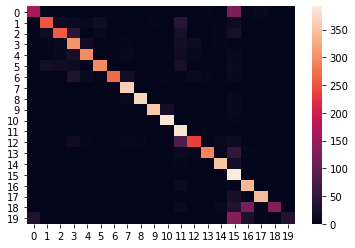

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(newsgroups_test.target, predicted)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm)
# plt.show()

In [16]:
cm

array([[166,   0,   0,   1,   0,   1,   0,   0,   1,   1,   1,   3,   0,
          6,   3, 123,   4,   8,   0,   1],
       [  1, 252,  15,  12,   9,  18,   1,   2,   1,   5,   2,  41,   4,
          0,   6,  15,   4,   1,   0,   0],
       [  0,  14, 258,  45,   3,   9,   0,   2,   1,   3,   2,  25,   1,
          0,   6,  23,   2,   0,   0,   0],
       [  0,   5,  11, 305,  17,   1,   3,   6,   1,   0,   2,  19,  13,
          0,   5,   3,   1,   0,   0,   0],
       [  0,   3,   8,  23, 298,   0,   3,   8,   1,   3,   1,  16,   8,
          0,   2,   8,   3,   0,   0,   0],
       [  1,  21,  17,  13,   2, 298,   1,   0,   1,   1,   0,  23,   0,
          1,   4,  10,   2,   0,   0,   0],
       [  0,   1,   3,  31,  12,   1, 271,  19,   4,   4,   6,   5,  12,
          6,   3,   9,   3,   0,   0,   0],
       [  0,   1,   0,   3,   0,   0,   4, 364,   3,   2,   2,   4,   1,
          1,   3,   3,   4,   0,   1,   0],
       [  0,   0,   0,   1,   0,   0,   2,  10, 371,   0,   0,  